In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Clickea aquí para ver u ocultar el código."></form>''')

# **Index**

1. Company and Data Overview
  1. The E-Commerce Business
  2. Olist Company
  3. Problem description
  4. The Dataset
  5. Additional Data
  6. Data Model

2. Data Management
  1. Lecture and Ingestion of Data
  2. Missing Values
  3. Duplicated Values  
  4. Categorical's Variables Treatment   
  5. Numerical's Variables Treatment  
  6. Target Variable Creation
  7. Hypotesis validation
3. Descriptive Statistics
   * Reviews Wordclouds
   * Review Score distribution by Delayed variable

4. Exploratoy Data Analysis
5. Prediction Model
   * Logistic Regression
   * Random Forest
   * XGboost

# **1. Company and Data Overview**
In this stage an overview of the company is detailed and the main business of the company is described. Then, a problem is defined as an objective to be solved, which will be justified in the following steps. Finally, the data model is described defining which data is going to be used.

## **1.1 The E-Commerce Business**
The **e-commerce business** consists on the distribution, sales, purchases, marketing and provision of information about products and services through the internet.   

However, this *e-commerce* concept is often used to describe the transaction of physical products on internet. That is to say an **Online Store**.   

With the advent of the Internet in the 90s, the concept of selling services or products over the Internet began using electronic means such as credit cards as a way of payment.   

Since then, companies have been concerned with being able to offer what their customers are demanding today.   
The years 2020/2021 could be known as the years of the **Internet of Things**, where connectivity with all devices makes e-commerce have an increasingly important role.

## **1.2 Olist Company**
Olist is the largest department store in Brazilian marketplaces. It connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers **using Olist logistics partners**.  

The business reflects more than a decade of activity in supporting small and medium entrepreneurs to win more customers.   

The founder of Olist is Tiago Dalvi, who created the company in 2015 with the mission of helping each and every shopkeeper to reach the biggest and best marketplaces nationals and internationals.   

The olist's commitment is closely linked to the structuring of a solid business and focused on the excellence of services provided to storeowners and final consumers. For this, the company's bet was to invest in a sustainable and fair business model for all involved.   

As slogan, Olist mentions some main words and phrases:   
   * olist is **credibility**: Focus on quality   
   * olist is **excellence**: Highly qualified professionals   
   * olist is **curitibano**: Operations are located in Curitiba city   
   * **freedom with responsibility** : Creativity, cooperation, learning and autonomy of people are stimulated

# **1.3 Problem Description**

As this company is an e-commerce company, there is no human interactions with the final user. For this reason, deliver on time looks like an important factor regarding the customer satasfaction. Besides according to the following paper "Relationship Between Customer Satisfaction and Overall Service Quality Toward Repurchase Intention" by Andika, warmann and RinisetioWati https://issuu.com/ijournals/docs/7.7115-albertus-compressed, the overall service quality over an online fashion store product will later have a positive effect on **repurchase intentions**. 

**The aim of this case study is to predict if an order through Olist E-Commerce is going to be delayed or not.**

Machine Learning models will be used to study **Delivery Performance**. In particular, delivery **delays** and, therefore, they will help to find ways to avoid them, determining which are the factors associated with **delays** delivers.

The main **hypothesis** on which the problem is based is that there is correlation between the delivery delay and the review score the customers give. This means that one of the reasons on which customers give a low score regarding their experience with Olist e-commerce experience could be the delivery delay experienced.

## **1.4 The Dataset**
The dataset provided by Olist company has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil.   
Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. There is also a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is shown, the customer gets a satisfaction survey by email where he or she can give a note for the purchase experience and write down some comments.

For every order made by the customer they provide some review good or bad for their purchase experience.

In [ ]:
from google.colab import drive
# mount google drive information in a google colaboratory directory
drive.mount('/content/gdrive')

path = r'gdrive/My Drive/Trabajos DS/Data/' # path
#path = "C:/Users/dlongas/Documents/Personal/utiles/billa/archive/"

Mounted at /content/gdrive


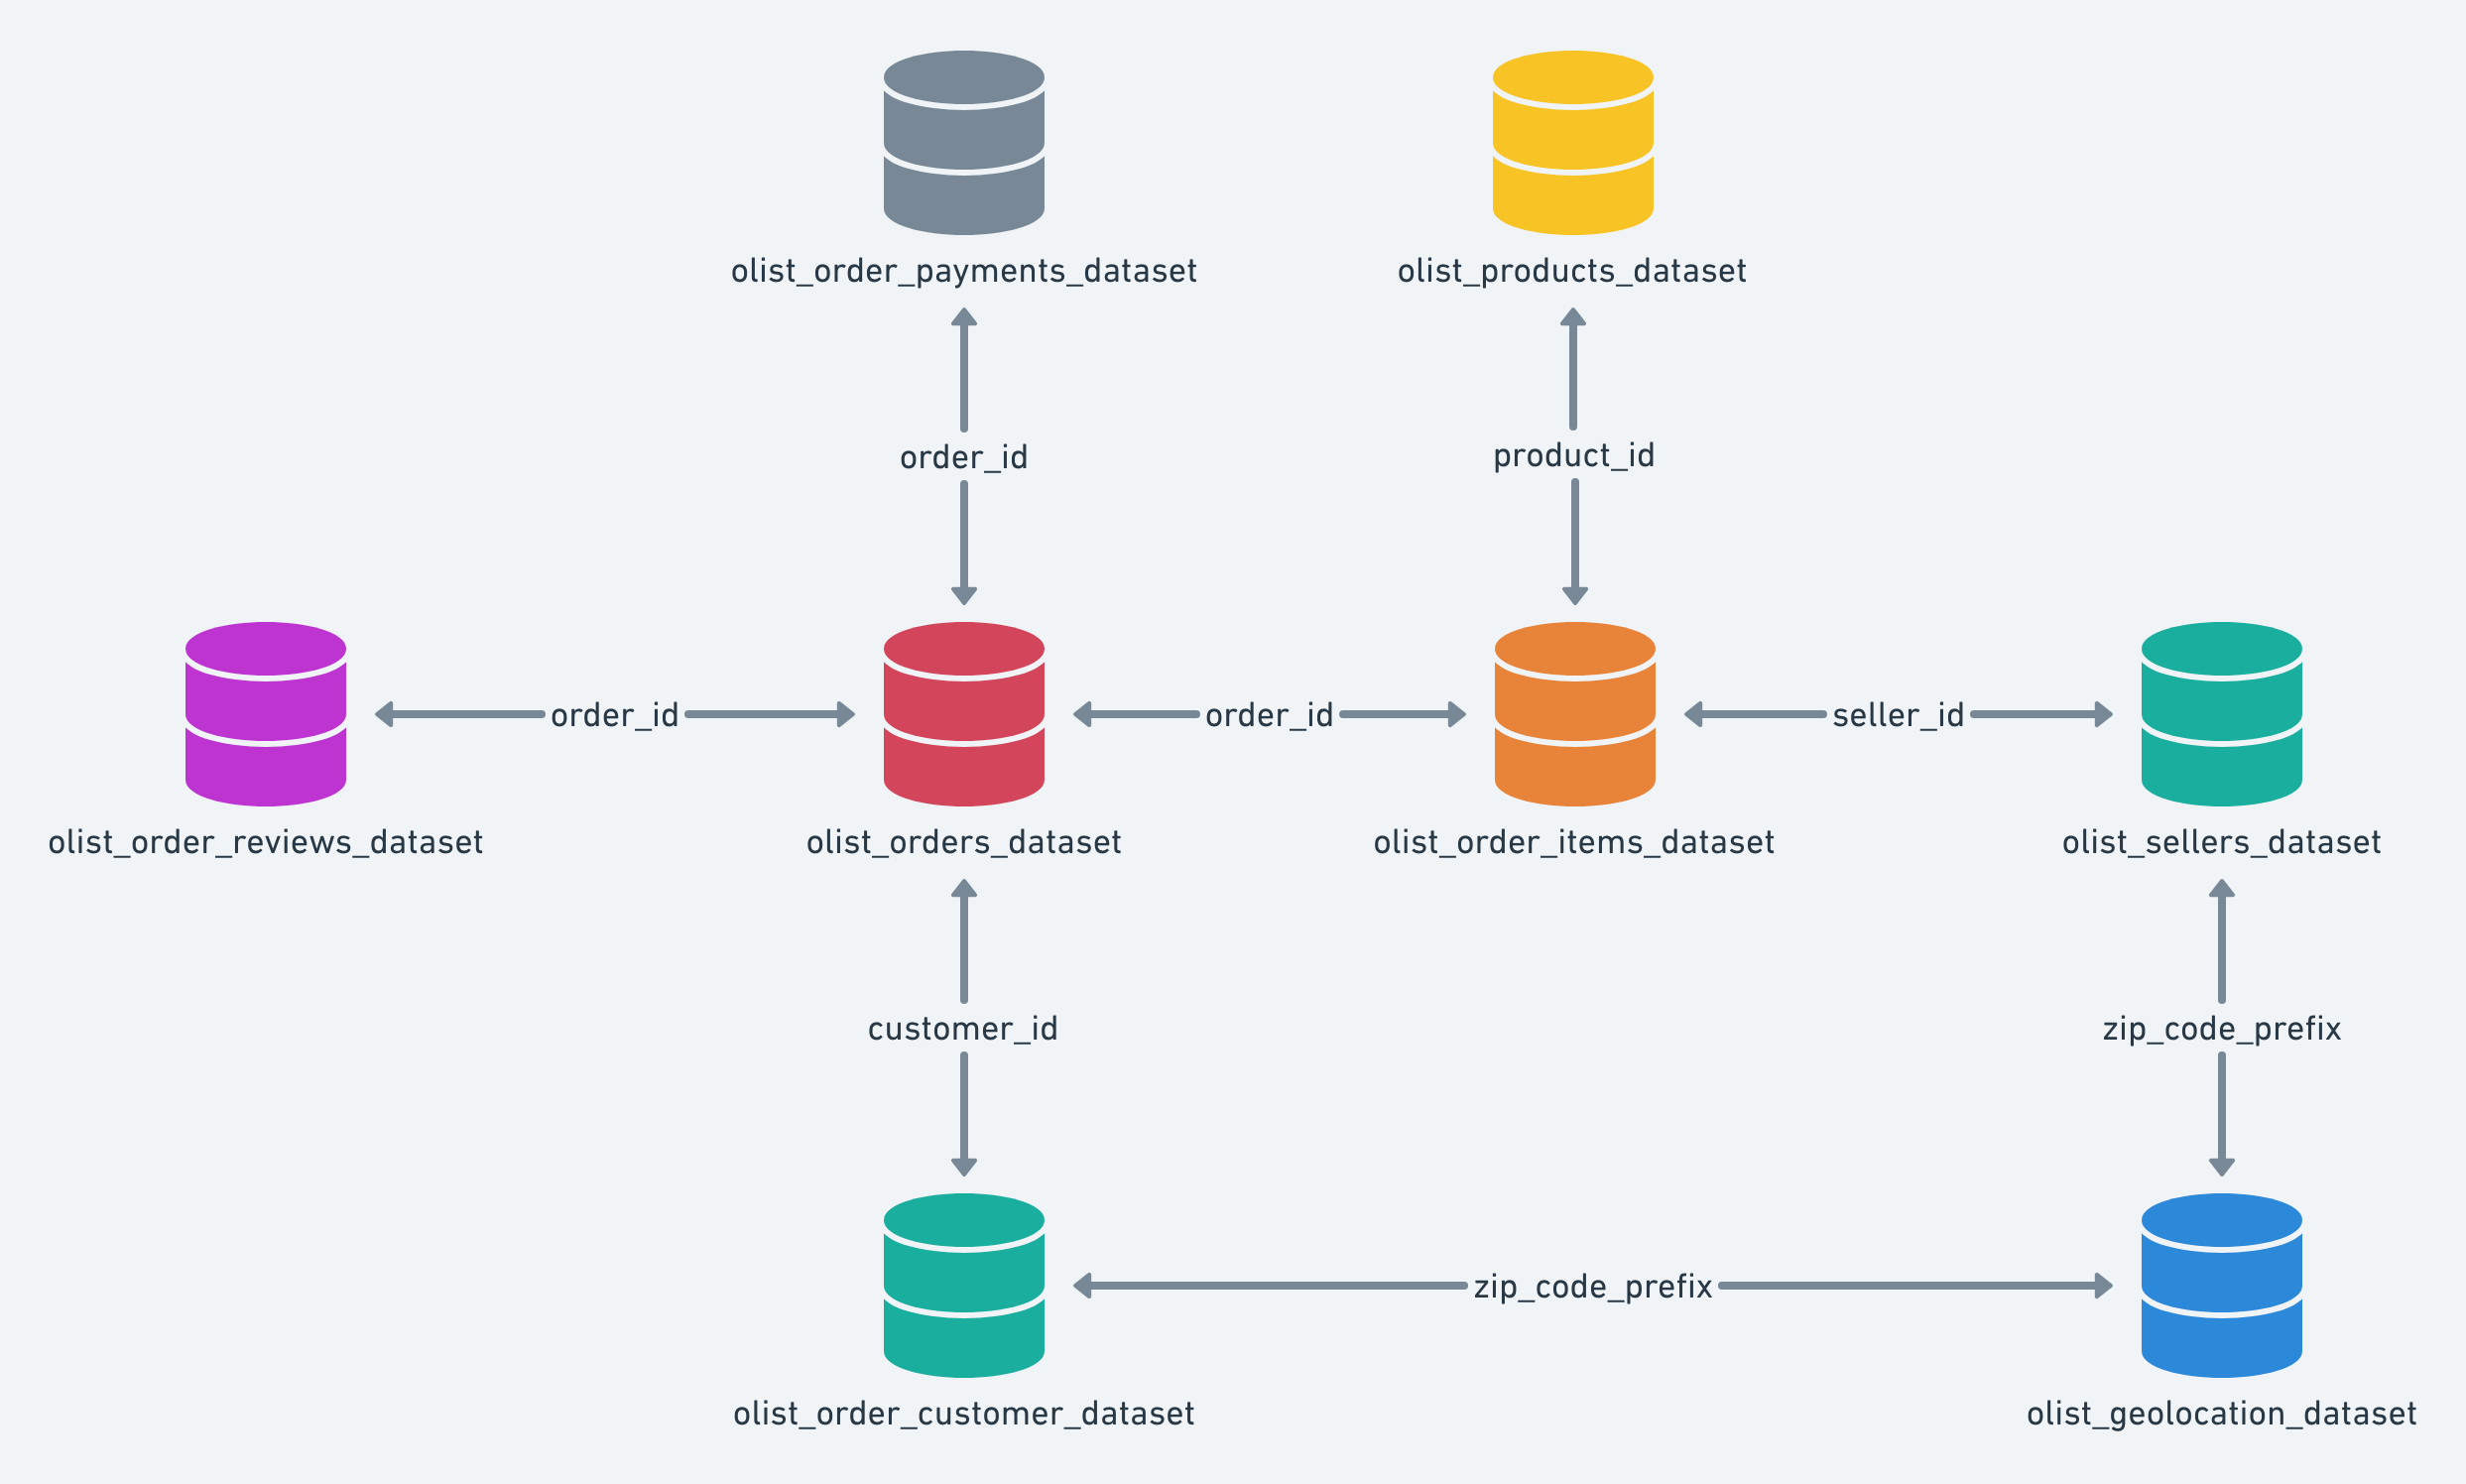

In [ ]:
from IPython.display import Image
Image(path+"der.png",width=650, height=400)

## **1.5 Additional Data**
An additional data that can be relevant to generate insights, is **Marketing Funnel by Olist**, from https://www.kaggle.com/olistbr/marketing-funnel-olist/home   
It is a marketing funnel dataset from **sellers that filled-in requests of contact to sell their products on Olist Store**. The dataset has information of 8k Marketing Qualified **Leads** (MQLs) that requested contact between Jun. 1st 2017 and Jun 1st 2018.

Its features allows viewing a **sales process** from multiple dimensions: lead category, catalog size, behaviour profile, etc.   

 **This data was not used because this study is focus on deliver orders, not in leads sellers and also this is a sample between jun 2017 and jun 2018 and our data is from 2016 to 2018.**


## **1.6 Data Model**
The data model consists on 9 datasets.
* An order might have multiple items
* Each item might be fulfilled by a distinct seller
* All text identifying stores and partners where replaced by the names of Game of Thrones great houses

**TABLES**:

### **Reviews (olist_order_reviews_dataset)**: 
This dataset contains information about the reviews from the customers, regarding their experience with the product or products they ordered. It is related to the "olist_orders_dataset" by the field *order_id*
        
Columns:   
   * review_id: id of the review.   
   * order_id: the unique id of order which the review refers to.   
   * review_score: the score that the customer gives to his or her experience with the order. It goes from 1 to 5
   * review_comment_title: Title of the review   
   * review_creation_date: date where the review was created, sent to the customer   
   * review_answer_timestamp: date where the review was answered   
   * review_comment_message: review comments posted by the consumer for each order.   
 
**This dataset is not going to be included in the final dataframe because the reviews are written after the order delivery. Nonetheless, this data is very useful to justify the hypothesis (there is a relationship between the review and the deliver on time).** 

### **Orders (olist_orders_dataset)**: 
This dataset contains information about the order done by a customer. It is related to:
 * The "olist_order_items_dataset" **as each order may consists on one or more items.**   
 * The "olist_order_customer_dataset". **Each order is made by a customer.**   
 * The "olist_order_payments_dataset". Each order is payed by a specific way.
 * The "olist_order_reviews_dataset". **Customer can make reviews about their experience making an order.**
        
Columns:
   * order_id: the unique id of order made by the customers
   * customer_id: id of the customer
   * order_status: status of the order made
   * order_purchase_timestamp: Timestamp of the purchase
   * order_approved_at: Timestamp of the order approval
   * order_delivered_carrier_date: delivery date at which carrier made the delivery
   * order_delivered_customer_date: date at which customer got the product
   * order_estimated_delivery_date: estimated delivery date of the products

### **Order Items (olist_order_items_dataset)**: 
This dataset consists on all the items each order contains. It is related to :
* The "olist_orders_dataset" as mentioned above.
* The "olist_products_dataset". **Each item is a product that has attributes.**
* The "olist_sellers_dataset". **Each item is sold by a seller.**
        
Columns:
   * order_id: the unique id of order made by the customers
   * order_item_id: unique Id given to each item ordered in the order
   * product_id: id of the product
   * seller_id: id of the seller
   * shipping_limit_date: The date before which shipping of the ordered product must be completed.
   * price: price of the products ordered
   * freight_value: price of the packaging of the products and freights

         
### **Payments (olist_order_payments_dataset)**: 
This dataset contains attributes of the way of payment the customer had done regarding the order. It is related to the mentioned table "olist_orders_dataset".
  
Columns:
   * order_id: the unique id of order made by the customers
   * payment_sequential: sequences of the payments made
   * payment_type: method used to pay for the purchase
   * payment_installments: Installments value
   * payment_value: amount paid for the orders

**This data is not going to be used because the payment is not related with the delivery condition, since there is no information about the cost of shipping in this table. In that case some conclussions can be made (a customer can get annoyed if paid for a shipping and the delivery is delayed)**
                

### **Customers (olist_order_customer_dataset)**: 
This dataset contains attributes of each customer. It is related to: 
* The "olist_orders_dataset". Each customer makes an order.
* The "olist_geolocation_dataset". Each customer lives in a specific city, state, latitude and longitude.
        
Columns:
   * customer_id: id of the consumer who made the purchase
   * customer_unique_id: unique id of the customer
   * customer_zip_code_prefix: zip address of the consumer who made the order
   * customer_city: city of the consumer
   * customer_state: state of the consumer

### **Products (olist_products_dataset)**: 
This dataset contains attributes of each product available in olist e-commerce. It is related to the "olist_category_name_translation". As each prodcut category name is in portugese languaje, this datasets shows its traduction in english.
        
Columns:
   * product_id: unique Id given to each product available on the site
   * product_category_name: category name of the product
   * product_name_lenght: length of the string which species the name given to the products ordered
   * product_description_lenght: length of the description written for each product ordered on the site
   * product_photos_qty: Number of photos of each product ordered available on the shopping portal
   * product_weight_g: weight of the products ordered in grams
   * product_length_cm: length of the products ordered in centimeters
   * product_height_cm: height of the products ordered in centimeters
   * product_width_cm: width of the product ordered in centimeters
            

### **Product Category Transaltion (olist_product_category_name_translation)**:
English traduction of the product category name.
Columns:
   * product_category_name: portuguese original category name
   * product_category_name_english: category to which the products belong to
                

### **Sellers (olist_sellers_dataset)**: 
This dataset contains attributes of each seller. It is related to:
* The "olist_order_items_dataset". Each item is sold by a seller.
* The "olist_geolocation_dataset". Each seller lives in a specific city, state, latitude and longitude
        
Columns:
   * seller_id:  id of the seller selling the product through the online store
   * seller_zip_code_prefix: zip address of the seller who made the order
   * seller_city: city of the seller
   * seller_state: state of the seller
            
### **Geolocation (olist_geolocation_dataset)**: 
This dataset contains attributes of the exact locations. It is related to the customers and sellers dataset.
        
Columns:
   * geolocation_zip_code_prefix: zip code
   * geolocation_lat: latitude
   * geolocation_lng: longitude
   * geolocation_city: city
   * geolocation_state: state

# **2. Data Management**
In this section the aim is to get the first version of the final dataset, merging the different tables and  getting rid of non significant variables in the business case. Furthermore, duplicate data, categorical and numerical variable's treatment and missing values are going to be tackled.

## **2.1 Lecture and Ingestion of Data**
This section is going to end up with the first version of the final dataset.

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import pylab as py 
from sklearn import linear_model
import datetime
import os
import pickle
import re

from IPython.display import Image
from wordcloud import WordCloud

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split 
from sklearn.metrics import mean_squared_error as MSE
from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

**Dataset Orders**

This is the main table, so it is the first to be read.

In [ ]:
df_orders = pd.read_csv(path+'olist_orders_dataset.csv',parse_dates=['order_purchase_timestamp','order_approved_at',\
                                                               'order_delivered_carrier_date','order_delivered_customer_date',\
                                                               'order_estimated_delivery_date'])
# yyyy-mm-dd format time
df_orders['order_purchase_timestamp'] = df_orders.order_purchase_timestamp.dt.date
df_orders['order_approved_at'] = df_orders.order_approved_at.dt.date
df_orders['order_delivered_carrier_date'] = df_orders.order_delivered_carrier_date.dt.date
df_orders['order_delivered_customer_date'] = df_orders.order_delivered_customer_date.dt.date
df_orders['order_estimated_delivery_date'] = df_orders.order_estimated_delivery_date.dt.date

print('Dataset size:',df_orders.shape)
df_orders.head(3)

Dataset size: (99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04


In [ ]:
df_orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp           634
order_approved_at                  611
order_delivered_carrier_date       547
order_delivered_customer_date      645
order_estimated_delivery_date      459
dtype: int64

One customer makes one order in this dataset

In [ ]:
df_orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

First, the dataset must be filtered by Order status *delivered*. For this problem, only finished orders received by customers are considered. A datframe (df) object is created in order to use it as the "*final dataframe*"

In [ ]:
df = df_orders[df_orders['order_status']=='delivered']
df.drop(columns=['order_status'],inplace=True)

The following variables are deleted because those can't be used in the model since they were generated between the order purchase and the order delivery.

In [ ]:
df.drop(columns=['order_approved_at','order_delivered_carrier_date'],inplace=True)
print('Dataset size:',df.shape)

Dataset size: (96478, 5)


**Dataset Customers**

In [ ]:
df_customers = pd.read_csv(path+'olist_customers_dataset.csv')

print('Dataset size:',df_customers.shape)
df_customers.head(3)

Dataset size: (99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [ ]:
df_customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [ ]:
df = pd.merge(df, df_customers, how='left', on='customer_id') #customer_id: id of the consumer who made the purchase
print('Dataframe size:', df.shape)

Dataframe size: (96478, 9)


Customer_unique_id is dropped because it is irrelevant

In [ ]:
df.drop(columns=['customer_unique_id'],inplace=True)

**Dataset Geolocation**

In [ ]:
df_geolocation = pd.read_csv(path+'olist_geolocation_dataset.csv')
df_geolocation.drop(columns=['geolocation_city',	'geolocation_state'],inplace=True)
df_geolocation=pd.DataFrame(df_geolocation.groupby(['geolocation_zip_code_prefix']).mean()[['geolocation_lat','geolocation_lng']].reset_index()) 
print('Dataset size:',df_geolocation.shape)
df_geolocation.head(3)

Dataset size: (19015, 3)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979
2,1003,-23.548994,-46.635731


In [ ]:
df = df.rename(columns={'customer_zip_code_prefix':'geolocation_zip_code_prefix'})
df = pd.merge(df, df_geolocation, how='left', on='geolocation_zip_code_prefix')
print('Dataframe size:', df.shape)

Dataframe size: (96478, 10)


In [ ]:
df = df.rename(columns={'geolocation_lat':'customer_geolocation_lat',
                        'geolocation_lng':'customer_geolocation_lng',
                        'geolocation_zip_code_prefix':'customer_zip_code_prefix'})

**Dataset Order Items**

In [ ]:
df_order_items = pd.read_csv(path+'olist_order_items_dataset.csv', parse_dates=['shipping_limit_date'])
df_order_items['shipping_limit_date'] = df_order_items.shipping_limit_date.dt.date # yyyy-mm-dd format time
print('Dataset size:',df_order_items.shape)
df_order_items.head(3)

Dataset size: (112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.0,17.87


In [ ]:
df_order_items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date      555
price                   5968
freight_value           6999
dtype: int64

An intermediate table is created only with the index, in order to get interesting joins with other tables.

In [ ]:
df_intermediate=df_order_items[['order_id','product_id','seller_id']]
df_intermediate.drop_duplicates(keep='last',inplace=True)

In this problem shipping limit date is not used, because it is related to the product, is not related with the order delivery itself. For this reason, the variable used is *order_delivered_customer_date* and *order_estimated_delivery_date* in the order table, which represent the estimated delivery date and the real one.

In [ ]:
#to keep referring to an order, it is necessary to make this group by
df_order_items_group=df_order_items.groupby(['order_id']).agg({
                                                     'price': ['sum'],
                                                     'freight_value': ['sum'],
                                                     'product_id':['nunique']},level=3).reset_index()
df_order_items_group.columns= ['order_id',  'total_price', 'total_freight_value', 'distinct_product_order']

In [ ]:
df = pd.merge(df, df_order_items_group, how='left', on='order_id')

**Dataset Products and translation**

In [ ]:
df_products = pd.read_csv(path+'olist_products_dataset.csv')
print('Dataset size:',df_products.shape)
df_products.head(3)

Dataset size: (32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [ ]:
df_category_name_translation = pd.read_csv(path+'product_category_name_translation.csv')
print('Dataset size:',df_category_name_translation.shape)
df_category_name_translation.head(3)

Dataset size: (71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


In [ ]:
df_products = pd.merge(df_products, df_category_name_translation, how='left', on='product_category_name')

The key aspect of a product in the problem (delivery) is the volume, the weight and if it is a fragile product or not.

In [ ]:
df_products['volume']=df_products['product_length_cm']*df_products['product_height_cm']*df_products['product_width_cm']
df_products.drop(columns=['product_length_cm','product_photos_qty','product_height_cm','product_category_name',
                          'product_width_cm','product_name_lenght','product_description_lenght'],inplace=True)

In [ ]:
df_products.nunique()

product_id                       32951
product_weight_g                  2204
product_category_name_english       71
volume                            4525
dtype: int64

In [ ]:
pd.set_option('display.max_rows', 20) # it can be changed to 73 to show all the products
pd.DataFrame(df_products.product_category_name_english.value_counts())

,product_category_name_english
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
...,...
tablets_printing_image,9
fashion_childrens_clothes,5
home_comfort_2,5
security_and_services,2


The following categories are consider as "fragile product" so, the variable *isFragile* is going to be populated as 1:
* furniture_decor
* health_beauty
* housewares
* watches_gifts
* telephony
* perfumery
* electronics
* home_appliances
* consoles_games
* musical_instruments
* air_conditioning
* home_appliances_2
* construction_tools_lights
* audio
* dvds_blu_ray
* small_appliances_home_oven_and_coffee
* computers
* music
* arts_and_craftmanship
* home_comfort_2
* cds_dvds_musicals

In [ ]:
df_products['isfragile']=np.where(df_products.product_category_name_english.isin(['furniture_decor',
                                                                                  'health_beauty','housewares','watches_gifts','telephony',
                                                                                  'perfumery','electronics','home_appliances','consoles_games',
                                                                                  'musical_instruments','air_conditioning',
                                                                                  'home_appliances_2','construction_tools_lights',
                                                                                  'audio','dvds_blu_ray','small_appliances_home_oven_and_coffee',
                                                                                  'computers','music','arts_and_craftmanship',
                                                                                  'home_comfort_2','cds_dvds_musicals']),1,0)

In [ ]:
df_products_items = pd.merge(df_intermediate, df_products, how='left', on='product_id')
df_products_items.head()

,order_id,product_id,seller_id,product_weight_g,product_category_name_english,volume,isfragile
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,650.0,cool_stuff,3528.0,0
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,30000.0,pet_shop,60000.0,0
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,3050.0,furniture_decor,14157.0,1
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,200.0,perfumery,2400.0,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,3750.0,garden_tools,42000.0,0


In [ ]:
df_products_items=df_products_items.groupby(['order_id']).agg({'product_weight_g': ['sum'],
                                                     'volume': ['sum'],
                                                     'isfragile': ['max']}).reset_index()
df_products_items.columns= ['order_id', 'total_weight', 'total_volume', 'isfragile']
df = pd.merge(df, df_products_items, how='left', on='order_id')

In [ ]:
df.head()

,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,total_price,total_freight_value,distinct_product_order,total_weight,total_volume,isfragile
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02,2017-10-10,2017-10-18,3149,sao paulo,SP,-23.576983,-46.587161,29.99,8.72,1,500.0,1976.0,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24,2018-08-07,2018-08-13,47813,barreiras,BA,-12.177924,-44.660711,118.70,22.76,1,400.0,4693.0,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08,2018-08-17,2018-09-04,75265,vianopolis,GO,-16.745150,-48.514783,159.90,19.22,1,420.0,9576.0,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18,2017-12-02,2017-12-15,59296,sao goncalo do amarante,RN,-5.774190,-35.271143,45.00,27.20,1,450.0,6000.0,0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13,2018-02-16,2018-02-26,9195,santo andre,SP,-23.676370,-46.514627,19.90,8.72,1,250.0,11475.0,0


**Dataset Sellers**

For sellers, the only information available is about location, so we can establish the **distance** between the customer and the seller, in order to figure out if the distance is a relevant factor in the delay.

In [ ]:
df_sellers = pd.read_csv(path+'olist_sellers_dataset.csv')
print('Dataset size:',df_sellers.shape)
df_sellers.head(3)

Dataset size: (3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [ ]:
df_sellers = df_sellers.rename(columns={'seller_zip_code_prefix':'geolocation_zip_code_prefix'})
df_sellers = pd.merge(df_sellers, df_geolocation, how='left', on='geolocation_zip_code_prefix')
print('Dataframe size:', df_sellers.shape)

Dataframe size: (3095, 6)


In [ ]:
df_sellers = df_sellers.rename(columns={'geolocation_lat':'seller_geolocation_lat',
                                        'geolocation_lng':'seller_geolocation_lng',
                                        'geolocation_zip_code_prefix':'seller_zip_code_prefix'})

In [ ]:
df_sellers_items = pd.merge(df_intermediate, df_sellers, how='left', on='seller_id')
#get the lng and lat of each customer in order to get the distance between the client and their sellers:
df_sellers_items = pd.merge(df[['order_id','customer_geolocation_lat','customer_geolocation_lng','customer_state','customer_city']], df_sellers_items, how='left', on='order_id')

In [ ]:
#New variables to determine if customer and seller lives in the same city and state
df_sellers_items['same_city']=np.where(df_sellers_items['customer_city']==df_sellers_items['seller_city'],1,0)
df_sellers_items['same_state']=np.where(df_sellers_items['customer_state']==df_sellers_items['seller_state'],1,0)

In [ ]:
#(latitud-y, longitude-x)
import geopy.distance
def distance(point1_y, point1_x, point2_y, point2_x):
    if(np.isnan(point1_y) or np.isnan(point2_y) or (point1_y is None) or (point1_x is None) or (point2_y is None) or (point2_x is None)):
      return(None)
    else:
      dist = geopy.distance.geodesic((point1_y, point1_x),(point2_y, point2_x)).kilometers
      return(dist)

df_sellers_items['distance'] = df_sellers_items.apply(lambda x: distance(x.customer_geolocation_lat, x.customer_geolocation_lng
                                                                         ,x.seller_geolocation_lat, x.seller_geolocation_lng),axis=1)


In [ ]:
df_sellers_items.head()

,order_id,customer_geolocation_lat,customer_geolocation_lng,customer_state,customer_city,product_id,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,same_city,same_state,distance
0,e481f51cbdc54678b7cc49136f2d6af7,-23.576983,-46.587161,SP,sao paulo,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,9350,maua,SP,-23.680729,-46.444238,0,1,18.566632
1,53cdb2fc8bc7dce0b6741e2150273451,-12.177924,-44.660711,BA,barreiras,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,31570,belo horizonte,SP,-19.807681,-43.980427,0,0,847.437333
2,47770eb9100c2d0c44946d9cf07ec65d,-16.745150,-48.514783,GO,vianopolis,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,14840,guariba,SP,-21.363502,-48.229601,0,0,512.100044
3,949d5b44dbf5de918fe9c16f97b45f8a,-5.774190,-35.271143,RN,sao goncalo do amarante,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,31842,belo horizonte,MG,-19.837682,-43.924053,0,0,1816.085655
4,ad21c59c0840e6cb83a9ceb5573f8159,-23.676370,-46.514627,SP,santo andre,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,8752,mogi das cruzes,SP,-23.543395,-46.262086,0,1,29.684401


In [ ]:
df_sellers_items=df_sellers_items.groupby(['order_id']).agg({'same_city': ['min'],
                                                             'same_state': ['min'],
                                                             'distance': ['max']}).reset_index()

In [ ]:
df_sellers_items.columns= ['order_id','all_same_city', 'all_same_state', 'max_distance']
df = pd.merge(df, df_sellers_items, how='left', on='order_id')

This is the final dataframe. Then some other variables are going to be created but there is no more joins.

In [ ]:
df.drop(columns=['customer_id','customer_geolocation_lat', 'customer_geolocation_lng'],inplace=True)

## **2.2 Missing Values**

In [ ]:
print('Dataset\n')
print(df.isnull().sum())

Dataset

order_id                           0
order_purchase_timestamp           0
order_delivered_customer_date      8
order_estimated_delivery_date      0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
total_price                        0
total_freight_value                0
distinct_product_order             0
total_weight                       0
total_volume                       0
isfragile                          0
all_same_city                      0
all_same_state                     0
max_distance                     476
dtype: int64


**order_delivered_customer_date** and **max_distance** have null values. In the first case the data is going to be deleted, and in the distance case is going to be changed by the median distance

In [ ]:
df = df[df['order_delivered_customer_date'].notnull()]
df['max_distance'].fillna(df['max_distance'].median(),inplace=True)
df.shape

### **2.3 Duplicated Values**
There is no duplicated values in the final dataset

In [ ]:
print('Original shape of  dataset:', df.shape)
print('Shape of Customers dataset removing duplicates:', df.drop_duplicates().shape)

Original shape of  dataset: (96470, 16)
Shape of Customers dataset removing duplicates: (96470, 16)


##**2.4 Categorical's Variables Treatment**

In [ ]:
df.dtypes

order_id                          object
order_purchase_timestamp          object
order_delivered_customer_date     object
order_estimated_delivery_date     object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
total_price                      float64
total_freight_value              float64
distinct_product_order             int64
total_weight                     float64
total_volume                     float64
isfragile                          int64
all_same_city                      int64
all_same_state                     int64
max_distance                     float64
dtype: object

In [ ]:
categoric_variables = ['customer_city', 'customer_state']

descriptive_table = df[categoric_variables].describe(include='all').round(decimals=3)
description_object = descriptive_table.loc[['count','unique','top','freq']] 
description_object

,customer_city,customer_state
count,96470,96470
unique,4085,27
top,sao paulo,SP
freq,15045,40494


The dataset only has 10 cities with more than 1% of the customers (over 4000 cities available).

In [ ]:
pd.DataFrame(df['customer_city'].value_counts()/df.shape[0]).head(10) #cuantas veces aparece cada ciudad en el dataset, sobre total filas

,customer_city
sao paulo,0.155955
rio de janeiro,0.068425
belo horizonte,0.027957
brasilia,0.021468
curitiba,0.015435
campinas,0.014574
porto alegre,0.013901
salvador,0.012315
guarulhos,0.011848
sao bernardo do campo,0.009443


In [ ]:
cities=pd.DataFrame(df['customer_city'].value_counts())
cities=cities['customer_city'].cumsum()/df.shape[0] #Cummulative Sum
cities.head(10)

sao paulo                0.155955
rio de janeiro           0.224381
belo horizonte           0.252338
brasilia                 0.273805
curitiba                 0.289240
campinas                 0.303815
porto alegre             0.317715
salvador                 0.330030
guarulhos                0.341878
sao bernardo do campo    0.351322
Name: customer_city, dtype: float64

In [ ]:
print("Cummulative distribution of the top 1 of the cities with more customer (%): ",round(cities.iloc[0]*100,3))
print("Cummulative distribution of the top 10 of the cities with more customer (%): ",round(cities.iloc[9]*100,3))
print("Cummulative distribution of the top 20 of the cities with more customer (%): ",round(cities.iloc[19]*100,3))
print("Cummulative distribution of the top 50 of the cities with more customer (%): ",round(cities.iloc[50]*100,3))
print("Cummulative distribution of the top 100 of the cities with more customer (%): ",round(cities.iloc[99]*100,3))
print("Cummulative distribution of the top 500 of the cities with more customer (%): ",round(cities.iloc[500]*100,3))

Cummulative distribution of the top 1 of the cities with more customer (%):  15.596
Cummulative distribution of the top 10 of the cities with more customer (%):  35.132
Cummulative distribution of the top 20 of the cities with more customer (%):  42.108
Cummulative distribution of the top 50 of the cities with more customer (%):  52.986
Cummulative distribution of the top 100 of the cities with more customer (%):  62.403
Cummulative distribution of the top 500 of the cities with more customer (%):  84.11


After the first 10 most populated cities, the marginal earning of adding a new city is not very significative. it's important to consider that the actions to be taken needs to be done in a suitable amount of potential customers.

In [ ]:
#New variable
df['customer_city_reduced']=np.where(df.customer_city.isin(['sao paulo','rio de janeiro',\
                                                            'belo horizonte','brasilia','curitiba',	'campinas','porto alegre','salvador',\
                                                            'guarulhos', 'sao bernardo do campo']),df.customer_city,'Other')

In the state case, the dataset is better in terms of distribution. It has 14 cities with more than 0.9% of the customers.

In [ ]:
pd.DataFrame(df['customer_state'].value_counts()/df.shape[0]).head(15)

,customer_state
SP,0.419757
RJ,0.128019
MG,0.117695
RS,0.055395
PR,0.051031
SC,0.036758
BA,0.033751
DF,0.021561
ES,0.020680
GO,0.020286


After the first 14 more populated states, the marginal earning of adding a new state is not significative. it's important to consider that the accions to be taken need to be done in a suitable amount of potential customers.

In [ ]:
states=pd.DataFrame(df['customer_state'].value_counts())
states=states['customer_state'].cumsum()/df.shape[0]
states.head(15)

SP    0.419757
RJ    0.547777
MG    0.665471
RS    0.720867
PR    0.771898
SC    0.808656
BA    0.842407
DF    0.863968
ES    0.884648
GO    0.904934
PE    0.921447
CE    0.934705
PA    0.944511
MT    0.953695
MA    0.961128
Name: customer_state, dtype: float64

In [ ]:
df['customer_state_reduced']=np.where(df.customer_state.isin(['SP', 'RJ', 'MG', 'RS', 'PR', 'SC', 'BA', 'DF',
                                                             'ES', 'GO', 'PE', 'CE','PA', 'MT']),df.customer_state,'Other')

## **2.5 Numerical's Variables Treatment**

In [ ]:
#New variable
df['percentage_freight_price']=df['total_freight_value']/(df['total_price']+df['total_freight_value'])

In [ ]:
numeric_variables = ['total_price','total_freight_value','percentage_freight_price','distinct_product_order','total_weight',
                     'total_volume', 'isfragile', 'all_same_city',
                     'all_same_state', 'max_distance']
descriptive_table = df[numeric_variables].describe(include='all').round(decimals=3)
description_numeric=descriptive_table.loc[['count','mean','std','min','25%','50%','75%','max']]   
description_numeric

,total_price,total_freight_value,percentage_freight_price,distinct_product_order,total_weight,total_volume,isfragile,all_same_city,all_same_state,max_distance
count,96470.000,96470.000,96470.000,96470.000,96470.000,96470.000,96470.000,96470.000,96470.000,96470.000
mean,137.040,22.786,0.209,1.039,2166.122,15667.431,0.411,0.051,0.358,600.142
std,209.053,21.560,0.126,0.228,3909.342,24549.904,0.492,0.220,0.480,590.604
min,0.850,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,45.900,13.850,0.117,1.000,300.000,2856.000,0.000,0.000,0.000,191.039
50%,86.500,17.170,0.183,1.000,700.000,6656.000,0.000,0.000,0.000,435.063
75%,149.900,24.020,0.276,1.000,1850.000,19008.000,1.000,0.000,1.000,796.500
max,13440.000,1794.960,0.955,8.000,154200.000,1476000.000,1.000,1.000,1.000,8652.120


## **2.6 Target Variable Creation**

The target variable should be a binary one which indicates if the order was delayed or not.
To do this, first an intermediate variable (**"diff_customer_estimated_days"**) should be created as the difference between the date on which the order was delivered to the customer and the date on which the order was estimated to have arrived to the customer's place.
Finally, a variable **"delayed"** is created. It is 0 when the previous difference is negative (order not delayed) and 1 when it is positive (order delayed)

**diff_customer_estimated**

In [ ]:
df['diff_customer_estimated_days'] = df['order_delivered_customer_date'] - df['order_estimated_delivery_date']
df[['order_delivered_customer_date','order_estimated_delivery_date','diff_customer_estimated_days']].head(3)

,order_delivered_customer_date,order_estimated_delivery_date,diff_customer_estimated_days
0,2017-10-10,2017-10-18,-8 days
1,2018-08-07,2018-08-13,-6 days
2,2018-08-17,2018-09-04,-18 days


**diff_customer_estimated_num:**       
Transformation of diff_customer_estimated variable into numeric

In [ ]:
df['diff_customer_estimated_num'] = df['diff_customer_estimated_days'].astype('str').str.split(' ', expand=True)[[0]]
df['diff_customer_estimated_num'] = df['diff_customer_estimated_num'].astype('int')
df.drop('diff_customer_estimated_days',axis=1, inplace=True)

**Target Variable "delayed"**

* 6.8% of the orders are delivered with delay. For example, in Amazon, the sellers must mantain a delay rate below 4% to be able to sell in Amazon. A delay rate above 4 %  can result in an account deactivaction.

In [ ]:
df['delayed'] = np.where(df['diff_customer_estimated_num']>0,1,0)
print('Percentage of non delayed and delayed orders: \n', df['delayed'].value_counts(normalize=True) * 100 )
df[['order_delivered_customer_date','order_estimated_delivery_date','diff_customer_estimated_num','delayed']].head(3)

Percentage of non delayed and delayed orders: 
 0    93.22691
1     6.77309
Name: delayed, dtype: float64


,order_delivered_customer_date,order_estimated_delivery_date,diff_customer_estimated_num,delayed
0,2017-10-10,2017-10-18,-8,0
1,2018-08-07,2018-08-13,-6,0
2,2018-08-17,2018-09-04,-18,0


In [ ]:
# Convert strings to datetime
df['order_purchase_timestamp_'] = pd.to_datetime(df.order_purchase_timestamp.astype(str),
                                                 format='%Y/%m/%d %H:%M:%S')
# create colunms for date(day/month/year)
df['purchase_month'] = df.order_purchase_timestamp_.dt.month
df = df.drop('order_purchase_timestamp_', axis=1)

In [ ]:
df.to_pickle(path+'dataset_olist.pkl')

## **2.7 Hypothesis validation**
In this step, the aim is to validate the problem. It's shown that delay orders are correlated with low score reviews. Also, the comments about the service, (for instance, when the service is bad) are related with the delivery time. In this section, reviews attributes are going to be included.
Finally, it is important to note that the company delivery rate is not so good (compared with others similar companies such as Amazon)

**Review Processing**

In [ ]:
df_order_reviews = pd.read_csv(path+'olist_order_reviews_dataset.csv')
print('Dataset size:',df_order_reviews.shape)
df_order_reviews.head(3)

Dataset size: (100000, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


The review score has no null values. For this reason I will not remove any rows from this dataset.

In [ ]:
df_order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
a = df_order_reviews[(df_order_reviews['review_comment_message'].isnull())&(df_order_reviews['review_comment_title'].isnull())]
print('There are ', a.shape[0], 'reviews with no title and message')

There are  56518 reviews with no title and message


New variable "review_comment_message_new": It consists on the same content of *review_comment_message* but having cleaned all the words it has.

In [ ]:
df_order_reviews['review_comment_message'] = np.where(df_order_reviews['review_comment_message'].isnull(), '',
                                                      df_order_reviews['review_comment_message'])

review_comment_message_new= []
for element in list(df_order_reviews['review_comment_message'].values):
    element = element.replace('\r', ' ')
    element = element.replace('\\"', ' ')
    element = element.replace('\n', ' ')
    element = re.sub(r"http\S+", "", element)
    element = re.sub(r'[^\w]', ' ', element)
    element = re.sub(r"\s+", " ", element)

    review_comment_message_new.append(element.lower().strip())
    
df_order_reviews['review_comment_message_new'] = review_comment_message_new
df_order_reviews.drop(['review_comment_message'], axis=1, inplace=True)

df_order_reviews.tail(3)

,review_id,order_id,review_score,review_comment_title,review_creation_date,review_answer_timestamp,review_comment_message_new
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,2017-12-15 00:00:00,2017-12-16 01:29:43,solicitei a compra de uma capa de retrovisor c...
99999,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,2017-07-03 00:00:00,2017-07-03 21:01:49,meu produto chegou e ja tenho que devolver poi...


New variable "review_title_message": This variable concats the title and the message of the review, to summarize the feeling of the customer regarding his or her order.

In [ ]:
df_order_reviews['review_comment_title'] = df_order_reviews['review_comment_title'].fillna('')
df_order_reviews['review_title_message'] = df_order_reviews['review_comment_title'] + ' ' + df_order_reviews['review_comment_message_new'] 
print(df_order_reviews[['review_comment_title','review_comment_message_new','review_title_message']])
df_order_reviews.drop(['review_comment_title','review_comment_message_new'], axis=1, inplace=True)

      review_comment_title  ...                               review_title_message
0                           ...                                                   
1                           ...                                                   
2                           ...                                                   
3                           ...               recebi bem antes do prazo estipulado
4                           ...   parabéns lojas lannister adorei comprar pela ...
...                    ...  ...                                                ...
99995                       ...                                                   
99996                       ...   excelente mochila entrega super rápida super ...
99997                       ...                                                   
99998                       ...   solicitei a compra de uma capa de retrovisor ...
99999                       ...   meu produto chegou e ja tenho que devolver po...

[10

*Rows with 1 review by order id*:   
If an order id has more than one review score, the last one will be considered, makeing the assumption that the last review reflects what the customer wanted to express.

In [ ]:
tmp = df_order_reviews.groupby(['order_id']).nunique()[['review_score']].sort_values('review_score', ascending=False)
print('Review Score value counts: \n',tmp['review_score'].value_counts())
tmp = tmp.reset_index().rename(columns={'review_score':'review_score_count'})[['order_id','review_score_count']]
tmp.head()

df_order_reviews = pd.merge(df_order_reviews, tmp, how='left', on='order_id')
df_order_reviews_keep = df_order_reviews[df_order_reviews['review_score_count']>1].sort_values(by=["order_id",\
                                                                                              "review_answer_timestamp"])\
                                                                                  .drop_duplicates(subset=["order_id"], keep="last")
df_order_reviews_keep = df_order_reviews_keep.drop(['review_score_count','review_title_message'], axis=1)
print('Number of rows which must be kept to have 1 review by order id: ', df_order_reviews_keep.shape[0])

df_order_reviews = pd.merge(df_order_reviews, df_order_reviews_keep, how='left', on=['review_id','order_id',\
                                                                                     'review_creation_date',
                                                                                     'review_answer_timestamp'])
print(df_order_reviews.shape)
df_order_reviews.head(3)

Review Score value counts: 
 1    99232
2      209
Name: review_score, dtype: int64
Number of rows which must be kept to have 1 review by order id:  209
(100000, 8)


,review_id,order_id,review_score_x,review_creation_date,review_answer_timestamp,review_title_message,review_score_count,review_score_y
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59,,1,NaN
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13,,1,NaN
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24,,1,NaN


In [ ]:
df_order_reviews = df_order_reviews[~((df_order_reviews['review_score_count']>1)&(df_order_reviews['review_score_y'].isnull()))]
df_order_reviews = df_order_reviews.drop(['review_score_y'], axis=1)
df_order_reviews = df_order_reviews.rename(columns={'review_score_x':'review_score'})
print('After deleting the auxiliar columns made recenlty and the earliest review made on an order id with more than one review score, the new Reviews table dataset shape is: ', df_order_reviews.shape)
df_order_reviews.head(3)

After deleting the auxiliar columns made recenlty and the earliest review made on an order id with more than one review score, the new Reviews table dataset shape is:  (99789, 7)


,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,review_title_message,review_score_count
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59,,1
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13,,1
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24,,1


In [ ]:
df_order_reviews = pd.merge(df_order_reviews[['order_id','review_score','review_title_message']], df[['order_id', 'delayed']], how='inner', on='order_id')

In [ ]:
df_order_reviews.head()

,order_id,review_score,review_title_message,delayed
0,73fc7af87114b39712e6da79b0a377eb,4,,0
1,a548910a1c6147796b98fdf73dbeba33,5,,0
2,f9e4b658b201a9f2ecdecbb34bed034b,5,,0
3,658677c97b385a9be170737859d3511b,5,recebi bem antes do prazo estipulado,0
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,parabéns lojas lannister adorei comprar pela ...,0


### **3. Descriptive Statistics**

In the following boxplot, it can be seen that the 75% of the on time order delivers have a review rate of 4 or 5. Whereas in the delay orders, the 75% of the distribution is between 1 and 4. Also, review score 1 or 2 is coherent with more delayed orders.

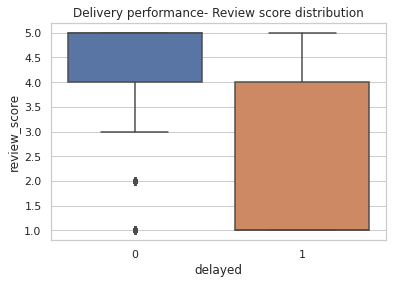

In [ ]:
plt.figure(figsize=(6,4))
sns.set_theme(style="whitegrid")
plt.title('Delivery performance- Review score distribution')
sns.boxplot(y='review_score', x='delayed', data=df_order_reviews);

#### Wordcloud - Positive Reviews
As it can be seen, in the positive reviews, the phrases such as "Chegou antes" (arrive before), "dentro prazo" (in time), "antes prazo" (before time),"bem antes"(before) are comments storngly related with the delivery on time. 

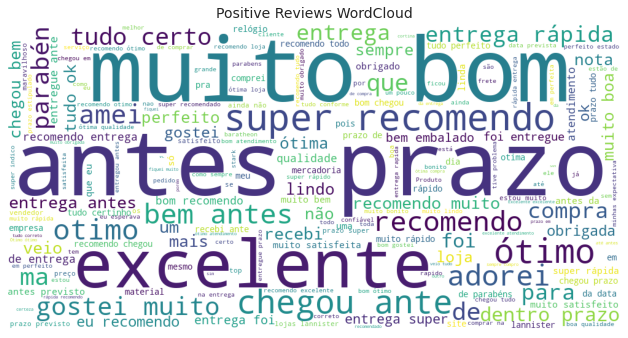

In [ ]:
df_order_reviews['words'] = df_order_reviews['review_title_message'].str.split('.',expand=True)[0] 

#WORDCLOUD
words_fem = df_order_reviews[(df_order_reviews['review_score']>4)]
words_fem = words_fem[words_fem['words']!='produto'] 
my_list = words_fem['words'].to_list()
new_list=[]
for sentence in my_list:
    if 'produto' not in sentence:
        new_list.append(sentence)
my_list = new_list
#convert list to string and generate
unique_string=(" ").join(my_list)
wordcloud = WordCloud(background_color="white", width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(11,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Positive Reviews WordCloud", fontsize=14)
plt.show()

#### Wordcloud - Negative Reviews
As it can be seen, in the negative reviews, the phrases such as "Nao Chegou" (i'm not receive), "nao recebi" (i'm not receive), "ainda nao" (not yet) are comments storngly related with delay deliveries. 

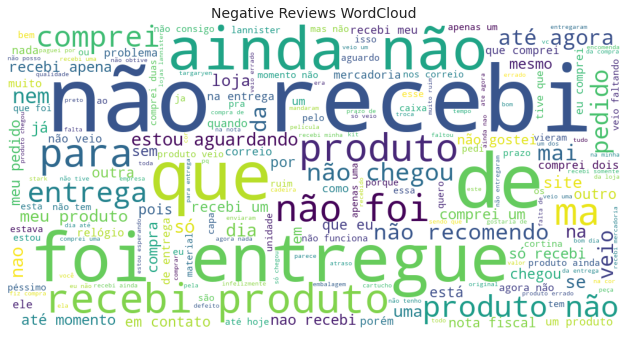

In [ ]:
#WORDCLOUD
words_fem = df_order_reviews[(df_order_reviews['review_score']<3)&(df_order_reviews['words']!='produto')]
my_list = words_fem['words'].to_list()
new_list=[]
for sentence in my_list:
    if 'produto' not in sentence:
        new_list.append(sentence)
    if 'de' not in sentence:
        new_list.append(sentence)
    if 'e' not in sentence:
        new_list.append(sentence)
my_list = new_list
#convert list to string and generate
unique_string=(" ").join(my_list)
wordcloud = WordCloud(background_color="white", width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(11,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Negative Reviews WordCloud", fontsize=14)
plt.show()

The main hypothesis on which the problem is based is that there is correlation between the delivery delay and the review score the customers give.   
This can be seen in the charts above where the delayed orders are concetrated in 1, 2 and 3 review scores, and less in the maximun score. 
On the contrary, the non delayed orders are concetrated in scores 4 and 5. Also postive comments are related with on time deliveries and negative comments are related with delay deliveries.

**It can be infered that one of the reasons on which customers give a low score regarding their experience with Olist e-commerce could be the delivery delay experienced**. 
